In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [2]:
data = pd.read_csv('KwhConsumptionBlower78_1.csv')
data = pd.DataFrame(data)

In [11]:
data = data.drop('TxnTime', axis=1)
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('TxnDate', axis = 1)

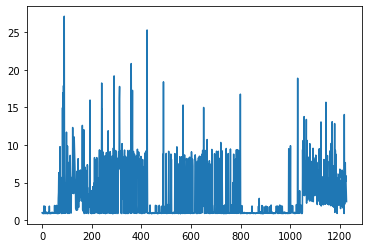

In [24]:
plt.plot(xlabel = "Consumption")
plt.plot(ylabel = "Time Instance")
plt.plot(data)

In [27]:
result = adfuller(data['Consumption'])
print('Adata Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Adata Statistic: -3.84748912269027
p-value: 0.0024571468528051255
Critical Values:
	1%: -3.435752466943879
	5%: -2.8639256700182405
	10%: -2.5680401696175466


/home/aks/.local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


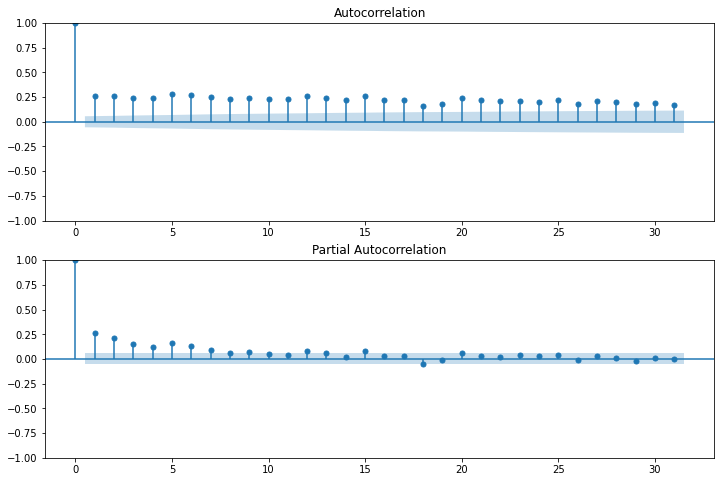

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Consumption'], ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Consumption'] ,ax=ax2)

In [36]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['Consumption'],order=(1,3,1))
model_fit=model.fit()
model_fit.summary()

/home/aks/.local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Consumption   No. Observations:                 1228
Model:                 ARIMA(1, 3, 1)   Log Likelihood               -3835.379
Date:                Sun, 16 Apr 2023   AIC                           7676.758
Time:                        19:52:38   BIC                           7692.090
Sample:                             0   HQIC                          7682.527
                               - 1228                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6700      0.013    -49.635      0.000      -0.696      -0.644
ma.L1         -0.9999      0.613     -1.632      0.103      -2.201       0.201
sigma2        30.4747     18.665      1.633      0.103      -6.107      67.057
===================================================================================
Ljung-Box (L1) (Q):                 135.83   Jarque-Bera (JB):               773.70
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

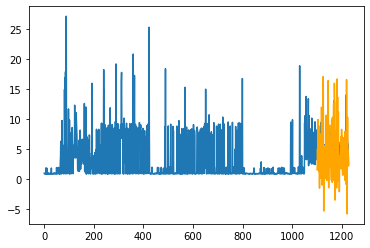

In [48]:
plt.plot(data)
plt.plot(model_fit.predict(1100), c = "orange")